## Feel the index

In [1]:
# numpy, pandas, matplotlib
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Solve PyPlot Chinese Language Problem
plt.rcParams['font.sans-serif'] = ['Songti SC']

# Solve PyPlot Negative number Problem
plt.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_excel('./data/data/国内主要股指的日收盘数据（2015-2019）.xlsx',
                     sheet_name='Sheet1', header=0, index_col=0, parse_dates=True)

In [3]:
data.head()

,上证综指,上证50,上证180,深证成指,沪深300,中证500
交易日,,,,,,
2015-01-05,3350.519,2649.639,8261.267,11520.590,3641.541,5417.017
2015-01-06,3351.446,2629.402,8215.575,11667.967,3641.059,5479.864
2015-01-07,3373.954,2635.231,8237.125,11613.356,3643.790,5488.242
2015-01-08,3293.456,2558.107,8012.598,11465.138,3559.259,5444.037
2015-01-09,3285.412,2569.019,8010.613,11324.762,3546.723,5409.058


array([[<AxesSubplot:xlabel='交易日'>, <AxesSubplot:xlabel='交易日'>],
       [<AxesSubplot:xlabel='交易日'>, <AxesSubplot:xlabel='交易日'>],
       [<AxesSubplot:xlabel='交易日'>, <AxesSubplot:xlabel='交易日'>]],
      dtype=object)

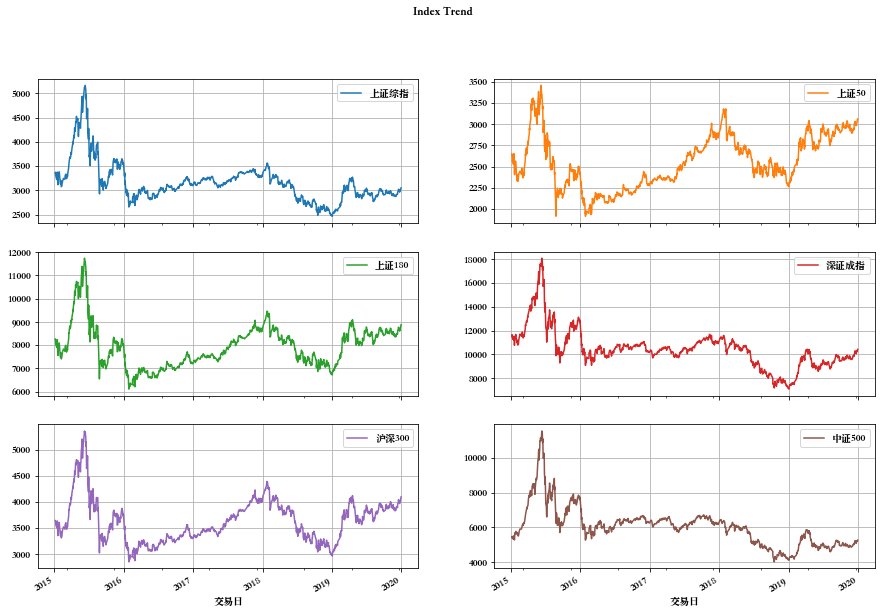

In [4]:
data.plot(subplots=True, layout=(3, 2),
          title='Index Trend', grid=True, figsize=(15, 10))

## Construct my portfolio

security picking standard:
1. postive ROIC during the last three years
2. top 6 based on accum ROIC

In [5]:
stocks = pd.read_excel('./data/data/全部A股2017-2019投入资本回报率ROIC.xlsx',
                       sheet_name="Sheet0", header=0, index_col=0, skipfooter=1)
stocks.head()

,证券名称,投入资本回报率ROIC\n[报告期]2017年年报\n[单位]%,投入资本回报率ROIC\n[报告期]2018年年报\n[单位]%,投入资本回报率ROIC\n[报告期]2019年年报\n[单位]%
证券代码,,,,
000001.SZ,平安银行,NaN,NaN,NaN
000002.SZ,万科A,18.637132,21.212465,18.367560
000004.SZ,国农科技,5.702958,-14.088504,-0.702403
000005.SZ,世纪星源,3.802078,9.320341,9.774974
000006.SZ,深振业A,14.403652,16.479529,13.669313


Data Cleaning

1. rename columns
2. drop NA data
3. pick securities with positive ROIC
3. sort data by "accum ROIC"

In [6]:
# Data Cleaning：
# rename colummn
stocks = stocks.rename(columns={
                       '投入资本回报率ROIC\n[报告期]2017年年报\n[单位]%': '2017',
                       '投入资本回报率ROIC\n[报告期]2018年年报\n[单位]%': '2018',
                       '投入资本回报率ROIC\n[报告期]2019年年报\n[单位]%': '2019'})

# drop NA
stocks = stocks.dropna()

# pick securities with positive ROIC
condition = (stocks['2017'] >= 0) & (
    stocks['2018'] >= 0) & (stocks['2019'] >= 0)
stocks_positive = stocks[condition]

# convert percentage into decimals
stocks_X = stocks_positive.iloc[:, 1:]/100 + 1

# add new columns "accum ROIC"
stocks_X['三年累计收益'] = stocks_X['2017'] * stocks_X['2018'] * stocks_X['2019']

# sort data by "accum ROIC"
stocks_X_sorted = stocks_X.sort_values(by='三年累计收益', ascending=False)

In [7]:
# construct our portfolio
port_index = stocks_X_sorted.iloc[0:6].index
port_ele_name = stocks.loc[port_index, ['证券名称']]

In [8]:
port_ele_name

,证券名称
证券代码,
000631.SZ,顺发恒业
600519.SH,贵州茅台
600132.SH,重庆啤酒
601098.SH,中南传媒
603288.SH,海天味业
000858.SZ,五粮液


## Calculate Portfolio Mean and Volatility 

In [9]:
data = pd.read_excel('./data/data/构建投资组合的六只股票数据（2017-2019）.xlsx',
                     sheet_name="Sheet1", header=0, index_col=0, parse_dates=True)
data.head()

,顺发恒业,重庆啤酒,中南传媒,贵州茅台,五粮液,海天味业
日期,,,,,,
2017-01-03,4.86,18.30,16.76,334.56,34.66,29.72
2017-01-04,4.87,18.46,16.78,351.91,35.90,29.73
2017-01-05,4.89,18.68,16.63,346.74,35.93,29.83
2017-01-06,4.79,18.34,16.31,350.76,36.10,29.60
2017-01-09,4.85,18.50,16.39,348.51,36.45,30.14


In [10]:
# daily return of single security
daily_return = np.log(data/data.shift(1))
daily_return = daily_return.dropna()

# annual return of single security
annual_mean = daily_return.mean() * 252

# daily volatility of single security
daily_vol = daily_return.std()

# annual volatility of single security
annual_vol = daily_vol*np.sqrt(252)

In [11]:
# define portfolio size
num = 6

# generate weights
weights = np.random.rand(num)

# sum of weights need to be 1
weights = weights/np.sum(weights)

# portfolio mean
port_mean = np.sum(weights*annual_mean)

# cov matrix calculation
annual_cov = daily_return.cov()*252

# portfolio volatility
port_vol = np.sqrt(np.dot(weights, np.dot(annual_cov, weights.T)))

In [12]:
print('weights', weights)
print('port_mean', port_mean)
print('port_vol', port_vol)

weights [0.36919031 0.08881705 0.01458923 0.06872212 0.38441789 0.0742634 ]
port_mean 0.21271708076861234
port_vol 0.2558922294976772


## Depict Effective Frontier

1. generate attainable portfolios as many as possible
2. get portfolio with min volatility given the expected return
3. get portfolio with min volatility of the market

In [13]:
# generate weights for portfolios given the size
def get_weights(num):
    weights = np.random.rand(num)
    weights = weights/np.sum(weights)
    return weights


# calculate mean and volatility of portfolios given weights
def get_port(weights):
    port_mean = np.sum(weights*annual_mean)
    annual_cov = daily_return.cov()*252
    port_vol = np.sqrt(np.dot(weights, np.dot(annual_cov, weights.T)))
    return (port_mean, port_vol)

In [14]:
# generate 1000 portolios
# x value list
x_vol_ls = []
# y value list
y_mean_ls = []
for i in range(1000):
    weights = get_weights(6)
    #     x means volatility
    x_vol_ls.append(get_port(weights)[1])
    #     y means mean
    y_mean_ls.append(get_port(weights)[0])

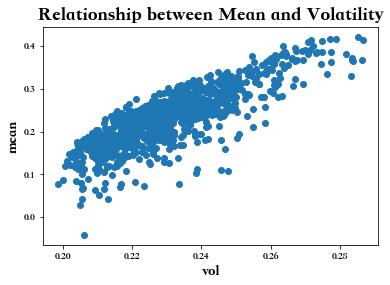

In [15]:
# plot all attainable portfolios
plt.scatter(x=x_vol_ls, y=y_mean_ls)
plt.xlabel('vol', fontsize=15)
plt.ylabel('mean', fontsize=15)
plt.title('Relationship between Mean and Volatility', fontsize=20)
plt.show()

using `minimize` to get the min of a function

input are below:
1. target function
2. boundaries of xs
3. constraints
4. initial values

In [16]:
# get portfolio with min volatility given return
import scipy.optimize as opt

# set expected return to 20%
return_exp = 0.2


# target function
def get_port_vol(weights):
    return abs(get_port(weights)[1])


# constraints in dict
# 1. sum of weights = 0
# 2. return of portofolio = expected return
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1},
        {'type': 'eq', 'fun': lambda x: get_port(x)[0]-return_exp})

# bond of weights
bounds = ((0, 1),) * 6

# start point of weights
weight_initial = [1/6 for i in range(6)]

# get minimize result
result = opt.minimize(get_port_vol, weight_initial,
                      method='SLSQP', constraints=cons,bounds=bounds)
result

     fun: 0.20529788278537253
     jac: array([0.14864914, 0.22982246, 0.15569741, 0.24233773, 0.27025766,
       0.24368534])
 message: 'Optimization terminated successfully'
    nfev: 50
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.01642898e-01, 9.25473756e-02, 3.07899329e-01, 2.62553130e-01,
       8.33480420e-18, 2.35357268e-01])

get min vol portfolio

In [17]:
# constraints in dict
# sum of weights = 0
cons_min_vol = {'type': 'eq', 'fun': lambda x: np.sum(x)-1}

min_vol_result = opt.minimize(fun=get_port_vol, x0=weight_initial,
                              method='SLSQP', bounds=bounds, constraints=cons_min_vol)

In [18]:
min_vol_result

     fun: 0.19512806515880143
     jac: array([0.19499519, 0.19503951, 0.19524453, 0.19495975, 0.22436873,
       0.1952212 ])
 message: 'Optimization terminated successfully'
    nfev: 49
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.39347623e-01, 3.98090584e-02, 3.94614252e-01, 1.56858063e-01,
       8.45677695e-18, 1.69371004e-01])

In [19]:
# get min vol of the model
port_min_vol = min_vol_result['fun']

# get mean of the portfolio with min vol
port_min_mean = np.sum(min_vol_result['x']*annual_mean)

print('mean of the portfolio with min vol：', port_min_vol)
print('volatility of the portfolio with min vol：', port_min_mean)

mean of the portfolio with min vol： 0.19512806515880143
volatility of the portfolio with min vol： 0.07348851552108125


In [20]:
# divide [port_min_mean,max_return] into 100 parts
ef_y_mean_ls = np.linspace(port_min_mean, max(y_mean_ls)*1.1, 100)
ef_x_vol_ls = []

# for each part use optimize.minimize to get portfolio with min volatility
for y in ef_y_mean_ls:
    # constraints in dict
    # 1. sum of weights = 0
    # 2. return of portofolio = expected return
    return_mean = y
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1},
            {'type': 'eq', 'fun': lambda x: get_port(x)[0]-return_mean})
    min_model = opt.minimize(fun=get_port_vol, x0=weight_initial,
                             bounds=bounds, constraints=cons, method='SLSQP')
    ef_x_vol_ls.append(min_model['fun'])

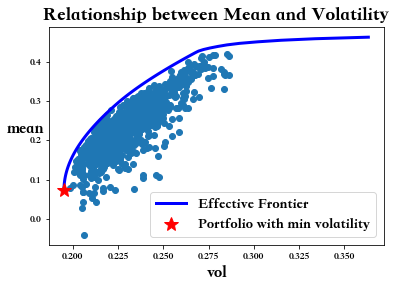

In [21]:
# get the scatter of all attainable portfolio
plt.scatter(x=x_vol_ls, y=y_mean_ls)
plt.xlabel('vol', fontsize=17)
plt.ylabel('mean', fontsize=17, rotation=0)
plt.title('Relationship between Mean and Volatility', fontsize=20)

# get the effecive frontier
plt.plot(ef_x_vol_ls, ef_y_mean_ls, 'b-',
         label='Effective Frontier', linewidth=3)
plt.plot(port_min_vol, port_min_mean, 'r*',
         label='Portfolio with min volatility', markersize=15)
plt.legend(fontsize=15, loc='best')
plt.show()

## Draw Capital Market Line

In [22]:
# define risk-free rate
rf = 0.2


# calculate sharp ratio given weights
def get_sharpRatio(weights):
    vol = get_port(weights)[1]
    mean = get_port(weights)[0]
    sr = (mean-rf)/vol
    return (vol, mean, sr)


def get_max_sharpRatio(weights):
    return -get_sharpRatio(weights)[-1]


# get the slope of CML with min sharop ratio
# constraints_cml = {'type': 'eq', 'fun': lambda wts: sum(wts)-1}
model_cml = opt.minimize(get_max_sharpRatio, weight_initial, method='SLSQP',
                         bounds=bounds, constraints=cons_min_vol)
model_cml

     fun: -0.8528165167177002
     jac: array([ 0.84999901, -0.71538267,  0.5456304 , -0.71506625, -0.71498995,
       -0.71518981])
 message: 'Optimization terminated successfully'
    nfev: 49
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.00000000e+00, 4.01976997e-02, 1.83734701e-16, 4.47863704e-01,
       7.53329615e-02, 4.36605635e-01])

In [23]:
# get vol given sharp ratio and mean
sr = -model_cml['fun']
wts = model_cml['x']
mean_max_sr = get_port(wts)[0]
vol_max_sr = get_port(wts)[1]

# divide free-free rate and max mean into 100 dots
y_ls_cml = np.linspace(rf, mean_max_sr*1.2, 100)


def get_vol_cml(mean):
    vol = (mean-rf)/sr
    return vol


x_ls_cml = []
# get vol given mean
for y in y_ls_cml:
    x = get_vol_cml(y)
    x_ls_cml.append(x)

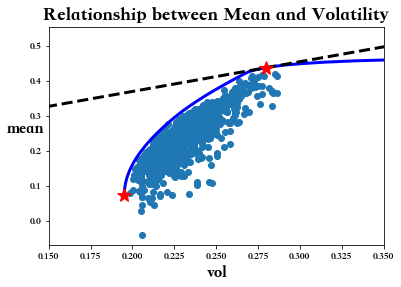

In [25]:
# draw the CML line
# get the scatter of all attainable portfolio
plt.scatter(x=x_vol_ls, y=y_mean_ls)
plt.xlabel('vol', fontsize=17)
plt.ylabel('mean', fontsize=17, rotation=0)
plt.title('Relationship between Mean and Volatility', fontsize=20)

# get the effecive frontier
plt.plot(ef_x_vol_ls, ef_y_mean_ls, 'b-',
         label='Effective Frontier', linewidth=3)
plt.plot(port_min_vol, port_min_mean, 'r*',
         label='Portfolio with min volatility', markersize=15)

# get the CML line
plt.plot(x_ls_cml, y_ls_cml, 'k--',
         label='CML', linewidth=3)
plt.plot(vol_max_sr, mean_max_sr, 'r*',
         label='Portfolio with max sharp ratio', markersize=15)

plt.xlim(0.15, 0.35)
plt.show()

## Risk Diversification

depict relationship between vol and size of portfolio

assume equal weight

In [26]:
stocks_data = pd.read_excel('./data/data/上证180指数成分股日收盘价（2017-2019年（剔除该期间上市和存在退市风险的股票））.xlsx',
                            sheet_name='Sheet1', header=0, index_col=0, parse_dates=True)
stocks_data.head()

,航天信息,新湖中宝,生物股份,复星医药,兖州煤业,生益科技,雅戈尔,中国巨石,华创阳安,中国船舶,...,国电南瑞,海澜之家,金地集团,江西铜业,浙江龙盛,恒力石化,华夏幸福,白云山,万华化学,安琪酵母
交易日期,,,,,,,,,,,,,,,,,,,,,
2017-01-03,23.67,10.88,10.97,14.03,15.11,31.91,7.14,12.43,13.32,23.89,...,11.82,7.16,25.99,4.80,11.39,10.55,10.28,18.70,25.53,28.97
2017-01-04,23.78,10.90,12.07,14.07,15.11,31.95,7.20,12.54,13.39,24.29,...,11.91,7.15,26.08,4.81,11.23,10.55,10.41,18.86,25.85,30.09
2017-01-05,23.61,11.04,11.95,14.00,15.14,32.24,7.35,12.51,13.37,24.05,...,11.87,7.10,27.05,4.79,11.29,10.58,10.32,19.00,25.59,29.80
2017-01-06,23.35,10.73,11.74,13.87,14.72,32.18,7.23,12.44,13.18,23.91,...,11.89,7.03,26.55,4.88,11.27,10.30,10.18,18.95,25.17,29.85
2017-01-09,23.41,10.80,11.74,13.89,14.36,33.48,7.42,12.46,13.20,24.16,...,11.92,7.07,26.72,4.95,11.50,10.23,10.30,18.99,25.26,30.42


In [27]:
stocks_return = np.log(stocks_data/stocks_data.shift(1))
stocks_return = stocks_return.dropna()
num_total_security = len(stocks_return.columns)
port_vol_ls=[]

In [28]:
for num in range(2, num_total_security+1):
    stocks_ls = stocks_return.iloc[:,: num]
    cov = stocks_ls.cov()*252
    weights = [1/num, ]*num
    port_vol = np.sqrt(np.dot(weights, np.dot(cov, np.array(weights).T)))
    port_vol_ls.append(port_vol)

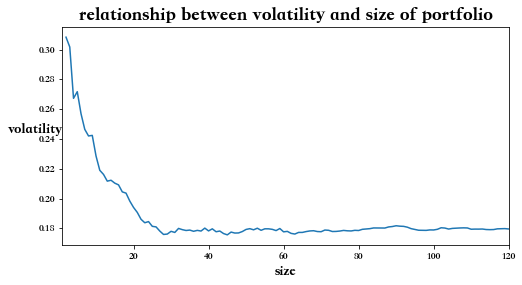

In [29]:
plt.figure(figsize=(8,4))
plt.plot(range(2, num_total_security+1),port_vol_ls )
plt.title("relationship between volatility and size of portfolio",fontsize=20)
plt.xlabel("size",fontsize=15)
plt.ylabel("volatility",fontsize=15,rotation=0)
plt.xlim(1,120)
plt.show()

## CAPM Model

In [30]:
data_index = pd.read_excel('./data/data/沪深300指数（2017-2019年）.xlsx',
                           sheet_name='Sheet1', header=0, index_col=0, parse_dates=True)

In [31]:
index_return = data_index/data_index.shift(1)
index_return = index_return.dropna()
index_return.head()

,沪深300
日期,
2017-01-04,1.007805
2017-01-05,0.999845
2017-01-06,0.994025
2017-01-09,1.004850
2017-01-10,0.998326


In [32]:
daily_return.head()

,顺发恒业,重庆啤酒,中南传媒,贵州茅台,五粮液,海天味业
日期,,,,,,
2017-01-04,0.002055,0.008705,0.001193,0.050559,0.035151,0.000336
2017-01-05,0.004098,0.011847,-0.008979,-0.014800,0.000835,0.003358
2017-01-06,-0.020662,-0.018369,-0.019430,0.011527,0.004720,-0.007740
2017-01-09,0.012448,0.008686,0.004893,-0.006435,0.009649,0.018079
2017-01-10,-0.002064,0.002160,-0.007963,0.001405,0.001371,0.003643


In [33]:
# get security return
equity_return = daily_return['贵州茅台']
equity_return.head()

日期
2017-01-04    0.050559
2017-01-05   -0.014800
2017-01-06    0.011527
2017-01-09   -0.006435
2017-01-10    0.001405
Name: 贵州茅台, dtype: float64

In [34]:
from scipy import stats
# get market return
market_return = index_return['沪深300']
# use linear regression model
model_linear = stats.linregress(market_return, equity_return)
model_linear

LinregressResult(slope=1.1129219909067782, intercept=-1.1115729191181298, rvalue=0.6382837661729691, pvalue=8.880654913206607e-85, stderr=0.0497466453441099, intercept_stderr=0.049766836967448914)

In [35]:
slope_CAPM = model_linear.slope
intercept_CAPM = model_linear.intercept


# predict equity return based on market return
def predict_ef(rm):
    rm = intercept_CAPM+slope_CAPM*rm
    return rm

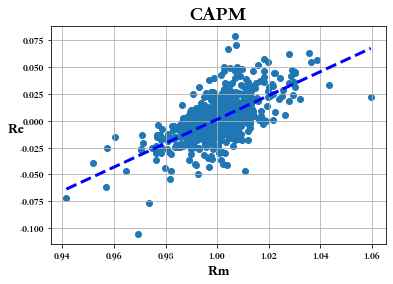

In [36]:
x_ls_CAPM = np.linspace(min(market_return), max(market_return), 100)
y_ls_CAPM = [predict_ef(x) for x in x_ls_CAPM]
plt.scatter(market_return, equity_return)
plt.xlabel('Rm', fontsize=15)
plt.ylabel('Re', rotation=0, fontsize=15)
plt.plot(x_ls_CAPM, y_ls_CAPM, 'b--', lw=3)
plt.title('CAPM', fontsize=20)
plt.grid(True)